In [7]:
from google.colab import files
uploaded = files.upload()


Saving matches.csv to matches.csv


In [8]:
import pandas as pd
df = pd.read_csv('matches.csv')
df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


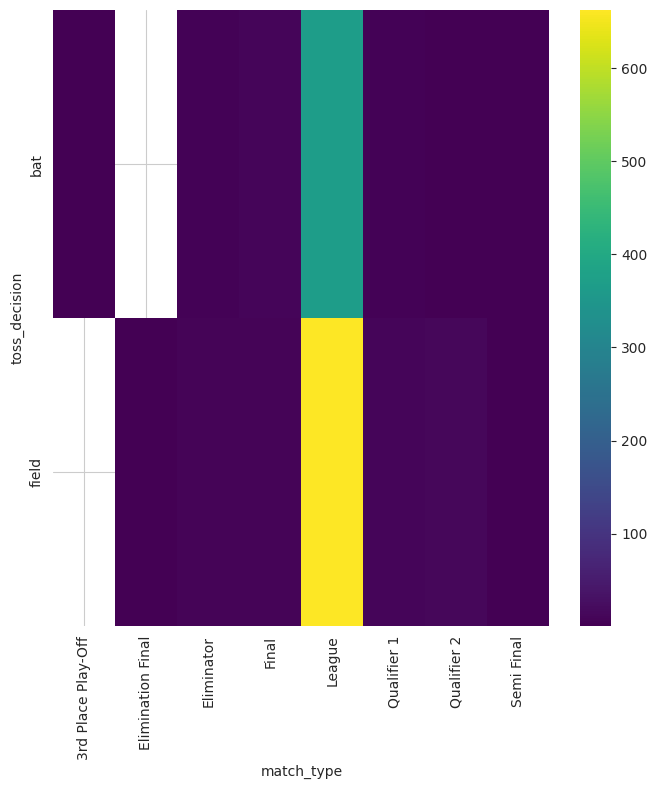

In [9]:
# @title match_type vs toss_decision

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['toss_decision'].value_counts()
    for x_label, grp in df.groupby('match_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('match_type')
_ = plt.ylabel('toss_decision')

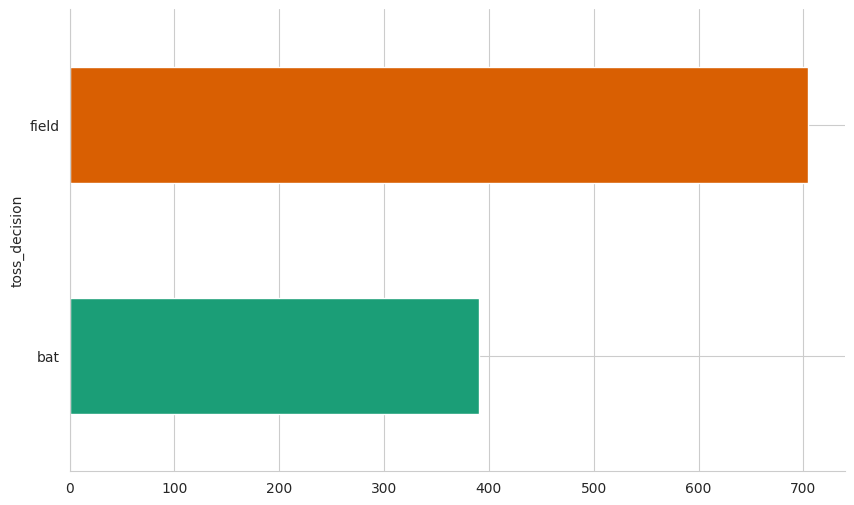

In [10]:
# @title toss_decision

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('toss_decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

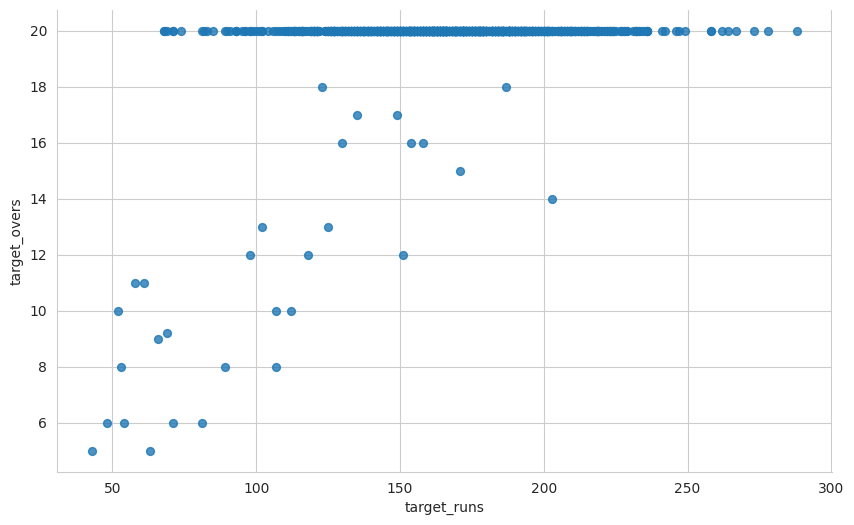

In [11]:
# @title target_runs vs target_overs

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='target_runs', y='target_overs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

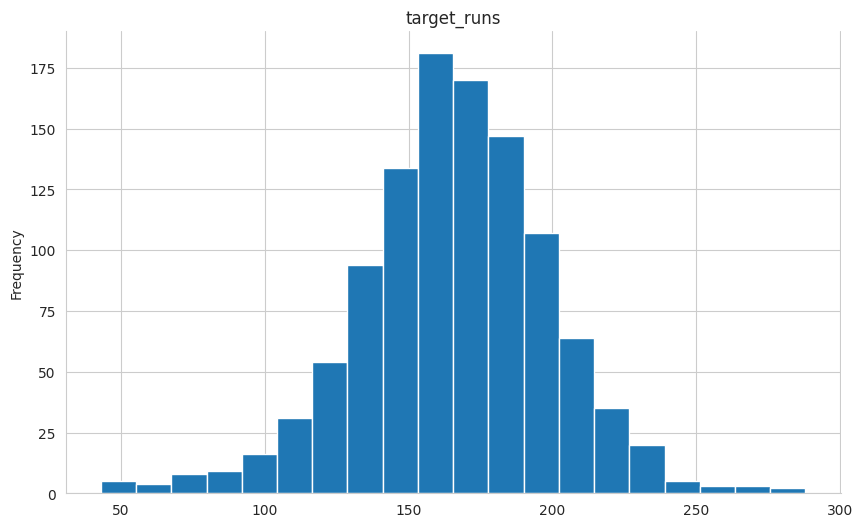

In [12]:
# @title target_runs

from matplotlib import pyplot as plt
df['target_runs'].plot(kind='hist', bins=20, title='target_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

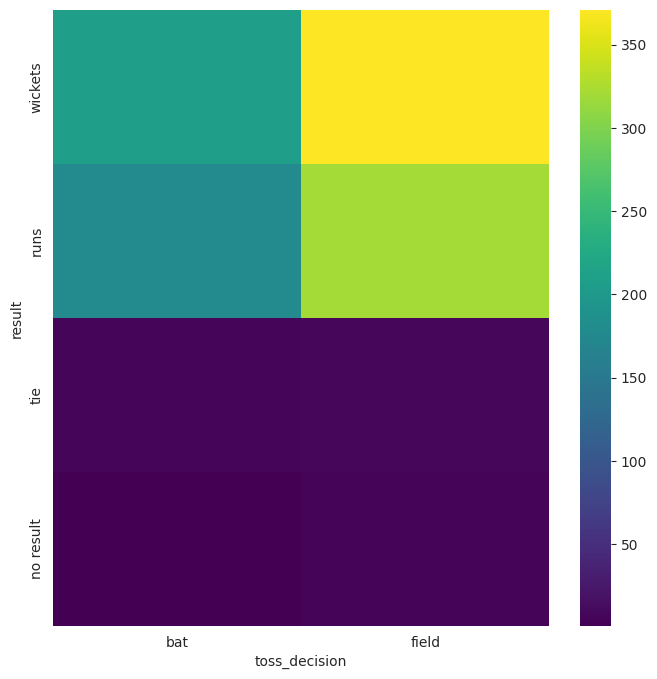

In [13]:
# @title toss_decision vs result

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['result'].value_counts()
    for x_label, grp in df.groupby('toss_decision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('toss_decision')
_ = plt.ylabel('result')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = 'matches.csv'

try:
    df = pd.read_csv(file_path)
    print("DataFrame 'df' loaded successfully from matches.csv!")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("\nColumn information:")
    df.info()
    print("\nColumn names:")
    print(df.columns.tolist())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure 'matches.csv' is in the correct directory or uploaded to Colab.")
    print("If it's in Google Drive, make sure you've mounted Drive and provided the correct path.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

DataFrame 'df' loaded successfully from matches.csv!

First 5 rows of the DataFrame:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

       

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

file_path = 'matches.csv'

try:

    dtype_dict = {
        'id': int,
        'season': str,
        'city': str,
        'match_type': str,
        'player_of_match': str,
        'venue': str,
        'team1': str,
        'team2': str,
        'toss_winner': str,
        'toss_decision': str,
        'winner': str,
        'result': str,
        'super_over': str,
        'method': str,
        'umpire1': str,
        'umpire2': str

    }

    df = pd.read_csv(file_path, dtype=dtype_dict, parse_dates=['date'])

    numeric_cols_to_convert = ['result_margin', 'target_runs', 'target_overs']
    for col in numeric_cols_to_convert:

        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame. Skipping conversion.")

    print("DataFrame 'df' loaded successfully with specified dtypes and date parsing!")
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("\nColumn Information (after type conversions):")
    df.info()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure 'matches.csv' is uploaded to your Colab session.")
    print("You can upload it using: from google.colab import files; files.upload()")
except Exception as e:
    print(f"An error occurred while loading or processing the file: {e}")

DataFrame 'df' loaded successfully with specified dtypes and date parsing!

First 5 rows of the DataFrame:
       id   season        city       date match_type player_of_match  \
0  335982  2007/08   Bangalore 2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh 2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi 2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai 2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Ri

Top Cities with most No Of matches played

In [27]:
# @title Top Cities with most No Of matches played

city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'match_count']


fig = px.choropleth(
    city_counts,
    locations="city",
    locationmode="country names", # Adjust based on your cities (e.g., "India" for Indian cities)
                                  # "country names" might not work well for all cities without additional data.
                                  # A better approach for specific cities is to merge with a dataframe
                                  # containing city, lat, lon.
    color="match_count",
    hover_name="city",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Number of Matches Played Per City"
)
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="lightgray",
        countrycolor="dimgray",
        showcountries=True,
        # You might want to set a specific scope, e.g., 'asia', 'world', 'usa'
        # scope='asia'
    )
)

# If the above choropleth doesn't work well due to city name inference,
# a simpler interactive bar chart for cities is also effective:
print("\n--- Interactive Bar Chart: Matches per City ---")
fig_bar_city = px.bar(
    city_counts.head(20), # Top 20 cities
    x='city',
    y='match_count',
    title='Top 20 Cities by Number of Matches Played',
    labels={'city': 'City', 'match_count': 'Number of Matches'},
    color='match_count',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_bar_city.update_xaxes(categoryorder='total descending')
fig_bar_city.show()


--- Interactive Bar Chart: Matches per City ---


In [28]:
# @title Matches Outcomes , Toss Decisions , Result

df_filtered = df.copy()
df_filtered['winner'].fillna('No Winner', inplace=True)
df_filtered['result'].fillna('Unknown', inplace=True)
df_filtered['toss_decision'].fillna('Unknown', inplace=True)


fig_sunburst = px.sunburst(
    df_filtered,
    path=['toss_decision', 'winner', 'result'],
    color='winner',
    title='Match Outcomes: Toss Decision, Winner, and Result',
    hover_data=['team1', 'team2', 'venue']
)
fig_sunburst.update_traces(marker=dict(line=dict(color='#ffffff', width=2)))
fig_sunburst.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig_sunburst.show()

/tmp/ipython-input-28-3668912655.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-28-3668912655.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)

In [29]:
# @title Player Of The Match Awards By Team

player_of_match_counts = df['player_of_match'].value_counts().reset_index()
player_of_match_counts.columns = ['player', 'award_count']
df_awards = df[df['player_of_match'].notna() & df['winner'].notna()].copy()

fig_treemap = px.treemap(
    df_awards,
    path=['winner', 'player_of_match'],
    color='player_of_match',
    title='Player of the Match Awards by Winning Team and Player',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_treemap.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig_treemap.show()

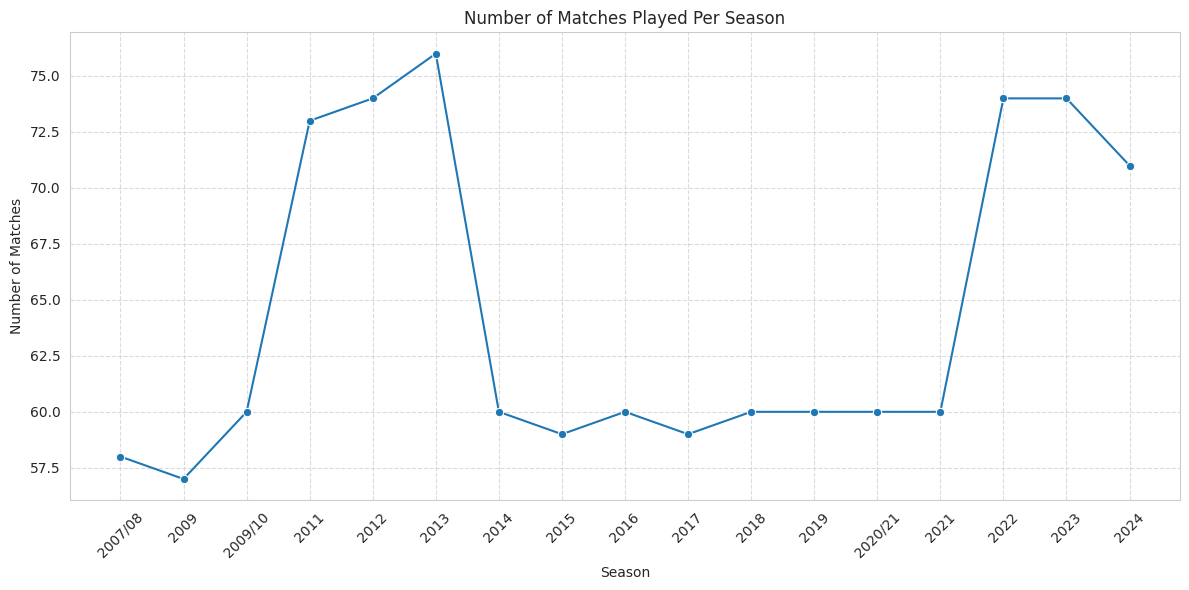

In [30]:
# @title No Of Matches Played Per Season

matches_per_season = df['season'].value_counts().sort_index().reset_index()
matches_per_season.columns = ['season', 'match_count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=matches_per_season, x='season', y='match_count', marker='o')
plt.title('Number of Matches Played Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



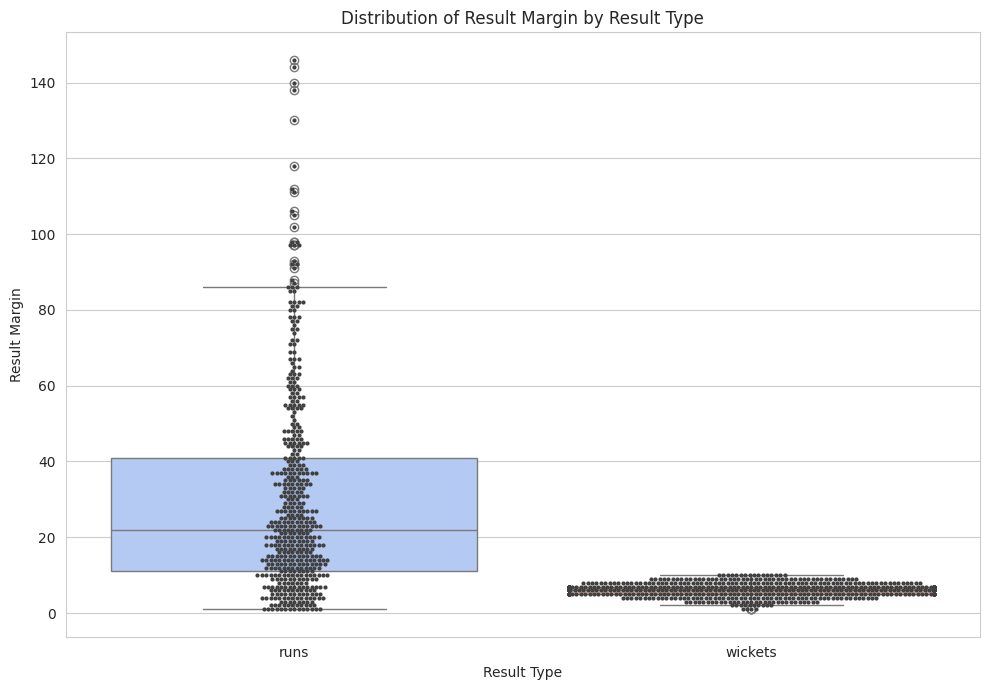

In [31]:
# @title Distribution of Result Margin by Result Type

df_margin = df[df['result'].isin(['runs', 'wickets']) & df['result_margin'].notna()].copy()

if not df_margin.empty:
    plt.figure(figsize=(10, 7))
    sns.boxplot(x='result', y='result_margin', data=df_margin, palette='coolwarm')
    sns.swarmplot(x='result', y='result_margin', data=df_margin, color='0.25', size=3) # Overlay individual points
    plt.title('Distribution of Result Margin by Result Type')
    plt.xlabel('Result Type')
    plt.ylabel('Result Margin')
    plt.tight_layout()
    plt.show()
else:
    print("\nWarning: No data available for 'result_margin' analysis with 'runs' or 'wickets' results. Check data or column values.")

In [32]:
# @title Team Win/Loss Performance Per Season

all_teams = pd.concat([df['team1'], df['team2']]).unique()
team_stats = []

for team in all_teams:

    team1_matches = df[df['team1'] == team].copy()
    team1_matches['outcome'] = team1_matches.apply(
        lambda row: 'Win' if row['winner'] == team else ('Loss' if row['winner'] != 'No Winner' else 'No Result'),
        axis=1
    )
    team1_matches['team'] = team

    team2_matches = df[df['team2'] == team].copy()
    team2_matches['outcome'] = team2_matches.apply(
        lambda row: 'Win' if row['winner'] == team else ('Loss' if row['winner'] != 'No Winner' else 'No Result'),
        axis=1
    )
    team2_matches['team'] = team


    combined_matches = pd.concat([team1_matches, team2_matches])
    outcome_counts = combined_matches.groupby(['team', 'outcome']).size().reset_index(name='count')
    team_stats.append(outcome_counts)

team_win_loss_df = pd.concat(team_stats)
team_win_loss_df = team_win_loss_df[team_win_loss_df['outcome'] != 'No Result']


print("\n--- Team Win/Loss Data Sample ---")
print(team_win_loss_df.head())


team_total_matches = team_win_loss_df.groupby('team')['count'].sum().sort_values(ascending=False).index
team_win_loss_df['team'] = pd.Categorical(team_win_loss_df['team'], categories=team_total_matches, ordered=True)


fig_team_performance = px.bar(
    team_win_loss_df,
    x='team',
    y='count',
    color='outcome',
    title='Team Win/Loss Performance Across All Seasons',
    labels={'team': 'Team', 'count': 'Number of Matches', 'outcome': 'Outcome'},
    barmode='stack',
    color_discrete_map={'Win': 'green', 'Loss': 'red'}
)
fig_team_performance.update_layout(xaxis_title="Team", yaxis_title="Number of Matches")
fig_team_performance.update_xaxes(tickangle=45)
fig_team_performance.show()

if 'season' in df.columns:
    team_season_stats = []
    for team in all_teams:
        for season in df['season'].unique():
            season_df = df[df['season'] == season].copy()
            team1_matches_season = season_df[season_df['team1'] == team].copy()
            team1_matches_season['outcome'] = team1_matches_season.apply(
                lambda row: 'Win' if row['winner'] == team else ('Loss' if row['winner'] != 'No Winner' else 'No Result'),
                axis=1
            )
            team1_matches_season['team'] = team
            team1_matches_season['season'] = season

            team2_matches_season = season_df[season_df['team2'] == team].copy()
            team2_matches_season['outcome'] = team2_matches_season.apply(
                lambda row: 'Win' if row['winner'] == team else ('Loss' if row['winner'] != 'No Winner' else 'No Result'),
                axis=1
            )
            team2_matches_season['team'] = team
            team2_matches_season['season'] = season

            combined_matches_season = pd.concat([team1_matches_season, team2_matches_season])
            outcome_counts_season = combined_matches_season.groupby(['team', 'season', 'outcome']).size().reset_index(name='count')
            team_season_stats.append(outcome_counts_season)

    team_season_win_loss_df = pd.concat(team_season_stats)
    team_season_win_loss_df = team_season_win_loss_df[team_season_win_loss_df['outcome'] != 'No Result']

    print("\n--- Team Win/Loss Data Sample (by Season) ---")
    print(team_season_win_loss_df.head())

    fig_team_season_performance = px.bar(
        team_season_win_loss_df,
        x='team',
        y='count',
        color='outcome',
        facet_col='season',
        facet_col_wrap=4,
        title='Team Win/Loss Performance Per Season',
        labels={'team': 'Team', 'count': 'Number of Matches', 'outcome': 'Outcome'},
        barmode='stack',
        color_discrete_map={'Win': 'green', 'Loss': 'red'},
        height=600
    )
    fig_team_season_performance.update_layout(xaxis_title="Team", yaxis_title="Number of Matches")
    fig_team_season_performance.update_xaxes(tickangle=45)
    fig_team_season_performance.show()


--- Team Win/Loss Data Sample ---
                          team outcome  count
0  Royal Challengers Bangalore    Loss    124
1  Royal Challengers Bangalore     Win    116
0              Kings XI Punjab    Loss    102
1              Kings XI Punjab     Win     88
0             Delhi Daredevils    Loss     94



--- Team Win/Loss Data Sample (by Season) ---
                          team   season outcome  count
0  Royal Challengers Bangalore  2007/08    Loss     10
1  Royal Challengers Bangalore  2007/08     Win      4
0  Royal Challengers Bangalore     2009    Loss      7
1  Royal Challengers Bangalore     2009     Win      9
0  Royal Challengers Bangalore  2009/10    Loss      8



--- Head-to-Head Total Matches Matrix Sample ---
                             Royal Challengers Bangalore  Kings XI Punjab  \
Royal Challengers Bangalore                            0               26   
Kings XI Punjab                                       26                0   
Delhi Daredevils                                      21               22   
Mumbai Indians                                        32               26   
Kolkata Knight Riders                                 32               27   

                             Delhi Daredevils  Mumbai Indians  \
Royal Challengers Bangalore                21              32   
Kings XI Punjab                            22              26   
Delhi Daredevils                            0              22   
Mumbai Indians                             22               0   
Kolkata Knight Riders                      21              34   

                             Kolkata Knight Riders  Rajasthan Royals  \
Royal Challengers Bangal

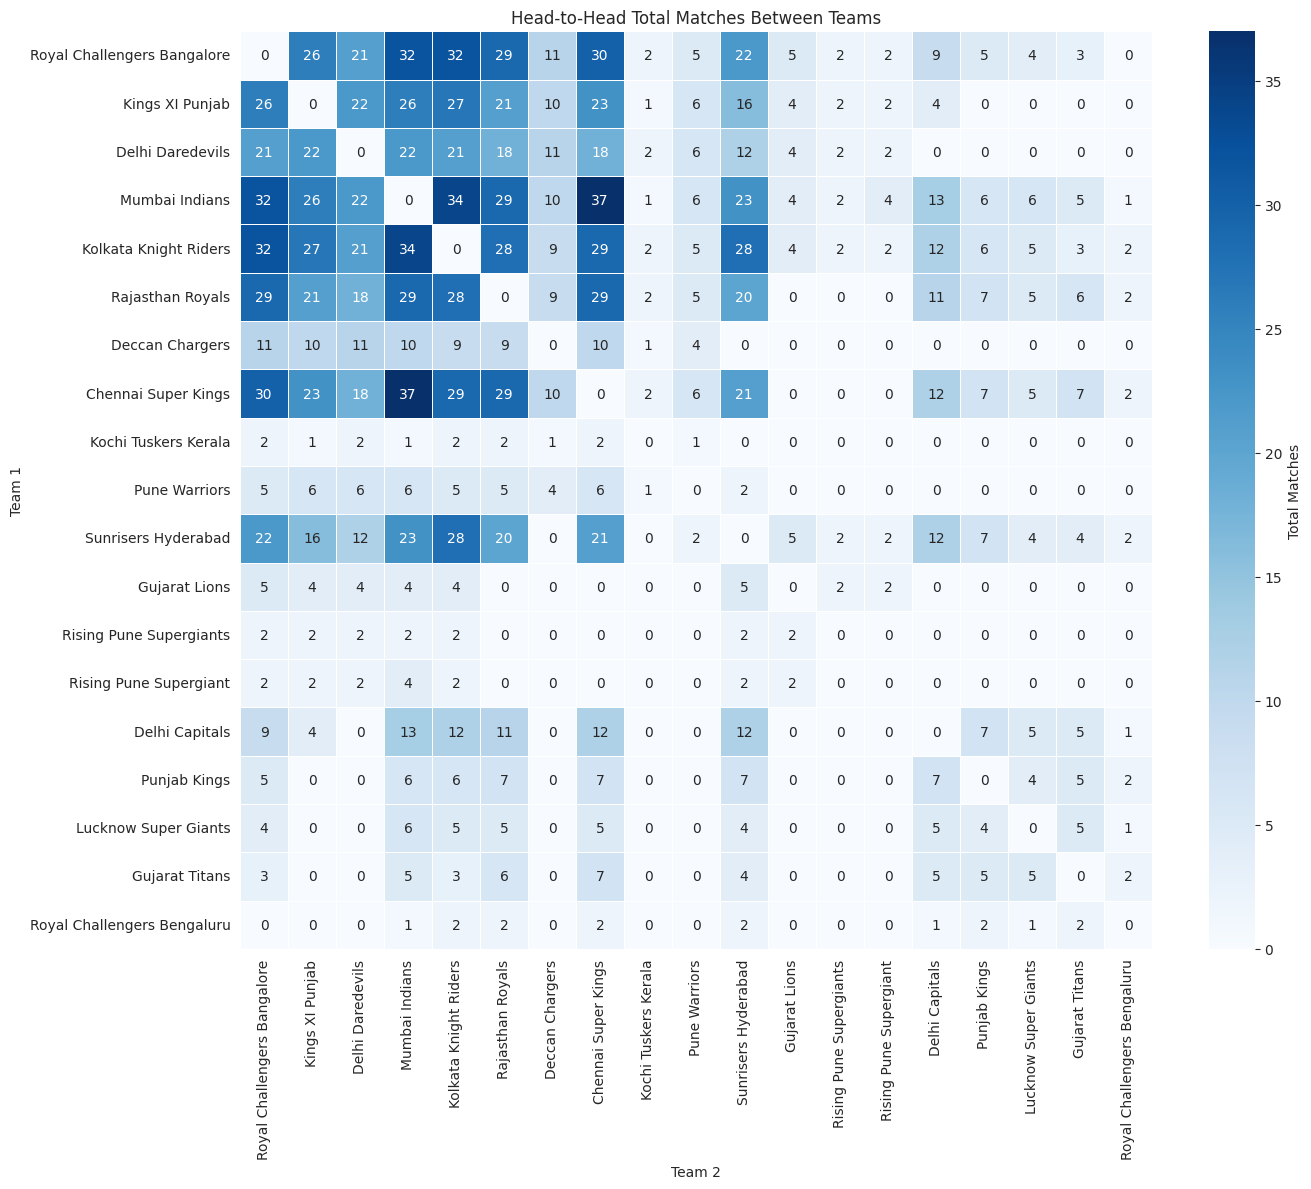

/tmp/ipython-input-35-45189322.py:73: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



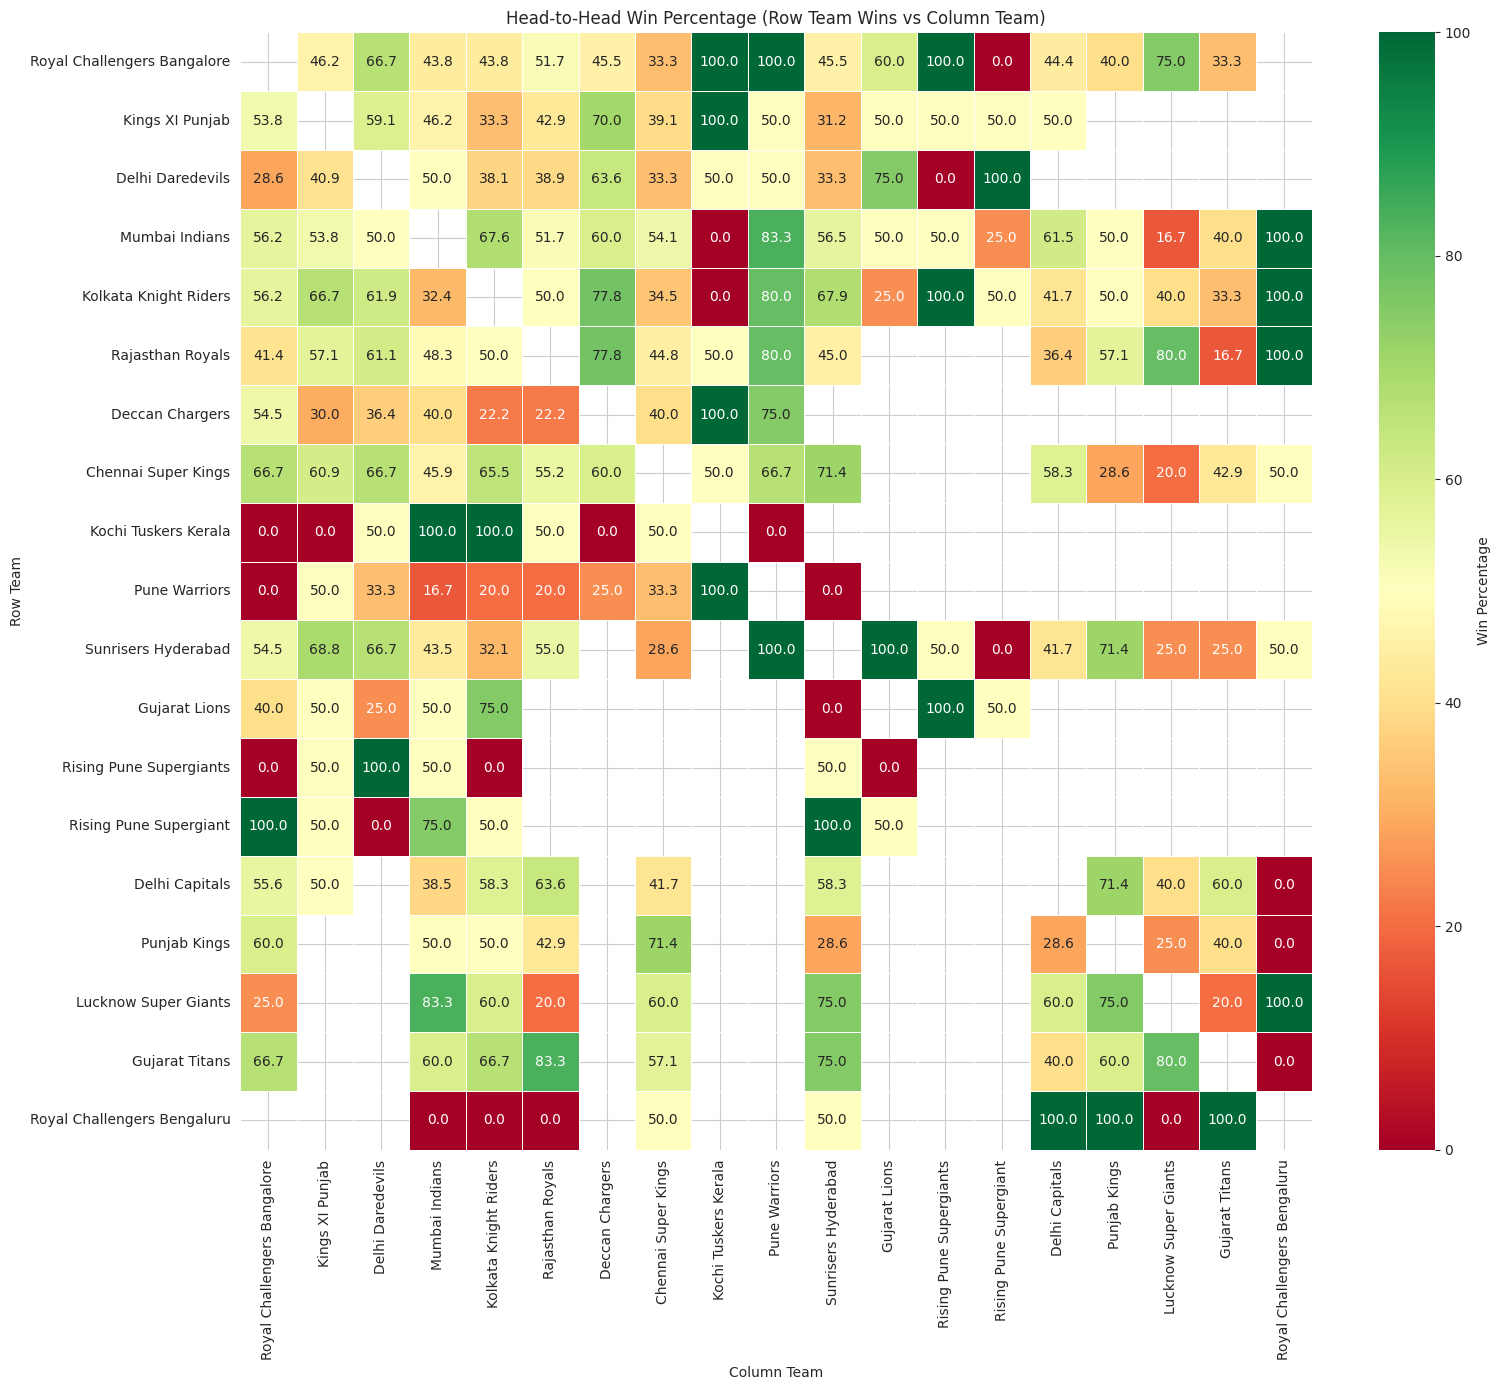

In [35]:
# @title Head-to-Head Total Matches Between Teams
df_h2h = df.copy()
df_h2h['team_pair'] = df_h2h.apply(lambda row: tuple(sorted([row['team1'], row['team2']])), axis=1)


match_counts = df_h2h.groupby(['team_pair']).size().reset_index(name='total_matches')
match_counts[['teamA', 'teamB']] = pd.DataFrame(match_counts['team_pair'].tolist(), index=match_counts.index)


h2h_total = pd.DataFrame(0, index=all_teams, columns=all_teams)

for index, row in df.iterrows():
    team1 = row['team1']
    team2 = row['team2']

    if team1 in h2h_total.index and team2 in h2h_total.columns:
        h2h_total.loc[team1, team2] += 1
        h2h_total.loc[team2, team1] += 1
for team in all_teams:
    if team in h2h_total.index and team in h2h_total.columns:
        h2h_total.loc[team, team] = 0

print("\n--- Head-to-Head Total Matches Matrix Sample ---")
print(h2h_total.head())

plt.figure(figsize=(14, 12))
sns.heatmap(
    h2h_total,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=.5,
    cbar_kws={'label': 'Total Matches'}
)
plt.title('Head-to-Head Total Matches Between Teams')
plt.xlabel('Team 2')
plt.ylabel('Team 1')
plt.tight_layout()
plt.show()

h2h_wins_matrix = pd.DataFrame(0, index=all_teams, columns=all_teams)
h2h_total_matrix = pd.DataFrame(0, index=all_teams, columns=all_teams)

for index, row in df.iterrows():
    t1 = row['team1']
    t2 = row['team2']
    winner = row['winner']

    if t1 in h2h_total_matrix.index and t2 in h2h_total_matrix.columns:
        h2h_total_matrix.loc[t1, t2] += 1
        h2h_total_matrix.loc[t2, t1] += 1

        if winner == t1:
            h2h_wins_matrix.loc[t1, t2] += 1
        elif winner == t2:
            h2h_wins_matrix.loc[t2, t1] += 1


h2h_win_percentage = h2h_wins_matrix / h2h_total_matrix.replace(0, pd.NA) * 100

h2h_win_percentage.fillna(0, inplace=True)

plt.figure(figsize=(16, 14))
sns.heatmap(
    h2h_win_percentage,
    annot=True,
    fmt=".1f",
    cmap="RdYlGn",
    linewidths=.5,
    cbar_kws={'label': 'Win Percentage'},
    mask=(h2h_total_matrix == 0)
)
plt.title('Head-to-Head Win Percentage (Row Team Wins vs Column Team)')
plt.xlabel('Column Team')
plt.ylabel('Row Team')
plt.tight_layout()
plt.show()

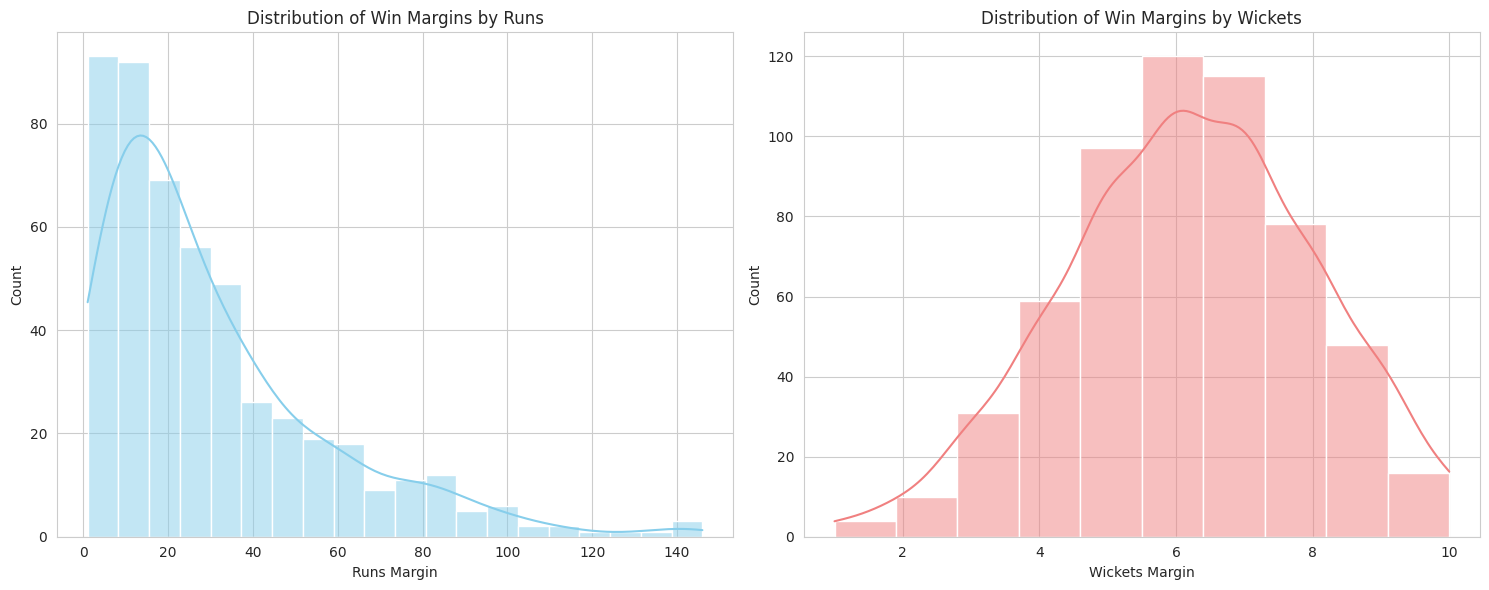

/tmp/ipython-input-25-4253307560.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



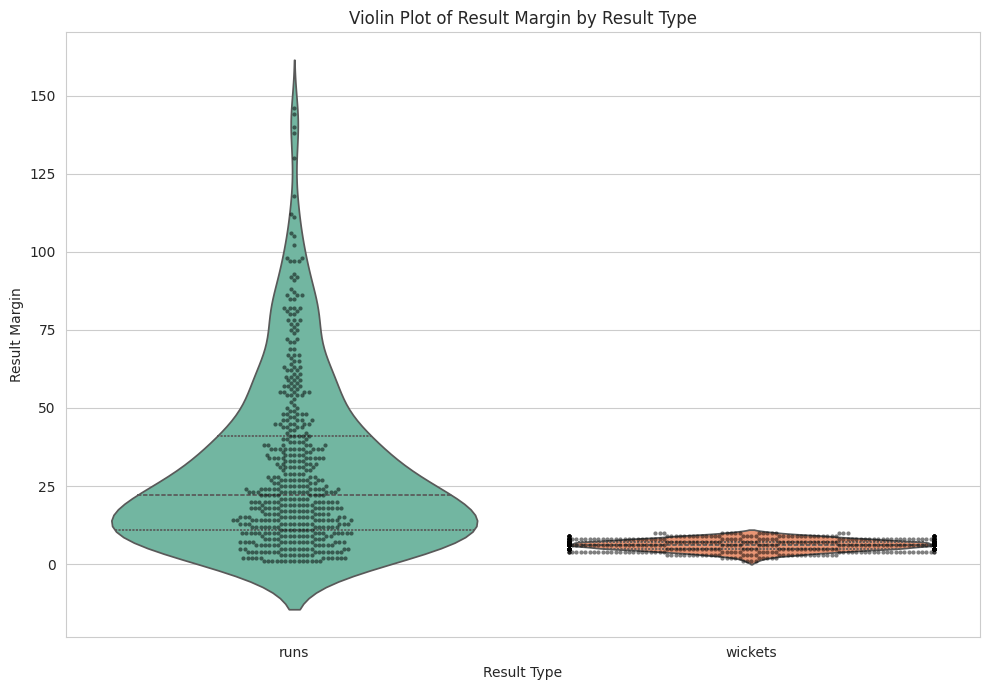

In [25]:

df_filtered_margins = df[
    df['result_margin'].notna() &
    df['result'].isin(['runs', 'wickets'])
].copy()

if not df_filtered_margins.empty:
    plt.figure(figsize=(15, 6))


    plt.subplot(1, 2, 1)
    sns.histplot(
        df_filtered_margins[df_filtered_margins['result'] == 'runs']['result_margin'],
        bins=20, kde=True, color='skyblue'
    )
    plt.title('Distribution of Win Margins by Runs')
    plt.xlabel('Runs Margin')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(
        df_filtered_margins[df_filtered_margins['result'] == 'wickets']['result_margin'],
        bins=10, kde=True, color='lightcoral'
    )
    plt.title('Distribution of Win Margins by Wickets')
    plt.xlabel('Wickets Margin')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(10, 7))
    sns.violinplot(
        x='result',
        y='result_margin',
        data=df_filtered_margins,
        inner='quartile',
        palette='Set2'
    )
    sns.swarmplot(
        x='result',
        y='result_margin',
        data=df_filtered_margins,
        color='black', alpha=0.5, size=3
    )
    plt.title('Violin Plot of Result Margin by Result Type')
    plt.xlabel('Result Type')
    plt.ylabel('Result Margin')
    plt.tight_layout()


else:
    print("\nNo data for 'result_margin' analysis. Please check 'result' column values and ensure 'result_margin' is numeric.")

In [26]:
# @title Scatter Plot Matrix of Numerical Match Statistics

numeric_cols = ['result_margin', 'target_runs', 'target_overs']

df_numeric = df[numeric_cols].dropna()

if not df_numeric.empty and len(numeric_cols) > 1:
    print("\n--- Interactive Scatter Plot Matrix ---")
    fig_pair = px.scatter_matrix(
        df_numeric,
        dimensions=numeric_cols,
        title='Scatter Plot Matrix of Numerical Match Statistics',
        height=700,
        color='result_margin',
        color_continuous_scale=px.colors.sequential.Viridis
    )
    fig_pair.update_traces(diagonal_visible=False)
    fig_pair.show()
else:
    print("\nNot enough complete numerical data for Scatter Plot Matrix. Check 'result_margin', 'target_runs', 'target_overs' columns and their NaN values.")


--- Interactive Scatter Plot Matrix ---


In [36]:
# @title Toss Decision vs. Match Outcome by Venue

import pandas as pd
import plotly.express as px

df_toss_impact = df.copy()
df_toss_impact['toss_won_match'] = (df_toss_impact['toss_winner'] == df_toss_impact['winner'])
df_toss_impact_venue = df_toss_impact.groupby(['venue', 'toss_decision', 'toss_won_match']).size().reset_index(name='count')

fig_toss_venue = px.bar(
    df_toss_impact_venue,
    x='venue',
    y='count',
    color='toss_won_match',
    barmode='group',
    facet_col='toss_decision',
    title='Toss Decision vs. Match Outcome by Venue',
    labels={'venue': 'Venue', 'count': 'Number of Matches', 'toss_won_match': 'Toss Winner Won Match'},
    color_discrete_map={True: 'green', False: 'red'},
    height=600
)
fig_toss_venue.update_xaxes(tickangle=45)
fig_toss_venue.show()

In [38]:
# @title Distribution of Match Types Across Seasons

import pandas as pd
import plotly.express as px

df_match_type_season = df.groupby(['season', 'match_type']).size().reset_index(name='count')

fig_match_type = px.bar(
    df_match_type_season,
    x='season',
    y='count',
    color='match_type',
    title='Distribution of Match Types Across Seasons',
    labels={'season': 'Season', 'count': 'Number of Matches', 'match_type': 'Match Type'},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_match_type.update_xaxes(tickangle=45)
fig_match_type.show()

In [45]:
# @title Match Outcomes by Toss Decision and Home/Neutral Ground Bias

import pandas as pd
import plotly.express as px

df_team_toss_perf = df.copy()

def get_home_team_status(row):
    if row['city'] in ['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata', 'Hyderabad', 'Jaipur', 'Mohali', 'Indore', 'Pune', 'Raipur', 'Ranchi', 'Visakhapatnam', 'Kanpur', 'Rajkot', 'Dharamsala', 'Nagpur']: # Common IPL cities
        if row['winner'] == row['toss_winner']:
            return 'Toss_Winner_Won_Match'
        else:
            return 'Toss_Winner_Lost_Match'
    return 'Neutral_Ground'

df_team_toss_perf['match_outcome_type'] = df_team_toss_perf.apply(get_home_team_status, axis=1)

df_agg_toss_perf = df_team_toss_perf.groupby(['toss_decision', 'match_outcome_type']).size().reset_index(name='count')

fig_toss_home_away = px.bar(
    df_agg_toss_perf,
    x='toss_decision',
    y='count',
    color='match_outcome_type',
    barmode='group',
    title='Match Outcomes by Toss Decision and Home/Neutral Ground Bias (Simplified)',
    labels={
        'toss_decision': 'Toss Decision',
        'count': 'Number of Matches',
        'match_outcome_type': 'Match Outcome Type'
    },
    color_discrete_map={
        'Toss_Winner_Won_Match': 'green',
        'Toss_Winner_Lost_Match': 'red',
        'Neutral_Ground': 'blue'
    }
)
fig_toss_home_away.show()

In [47]:
# @title Winner Distribution by Season and Result Type
import pandas as pd
import plotly.express as px

df_sunburst_winner = df[df['winner'].notna() & df['result'].isin(['runs', 'wickets'])].copy()

fig_winner_season_result = px.sunburst(
    df_sunburst_winner,
    path=['season', 'winner', 'result'],
    color='result',
    title='Winner Distribution by Season and Result Type',
    color_discrete_map={'runs': 'gold', 'wickets': 'darkblue'}
)
fig_winner_season_result.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig_winner_season_result.show()

In [52]:
# @title Longest Win and Loss Streaks by Team

import pandas as pd
import plotly.express as px

def calculate_streaks(team_df, team_name):
    streaks = []
    current_streak_type = None
    current_streak_length = 0

    for idx, row in team_df.iterrows():
        outcome = 'win' if row['winner'] == team_name else ('loss' if row['winner'] != 'No Winner' else 'no_result')

        if outcome == 'no_result':
            if current_streak_length > 0:
                streaks.append({'team': team_name, 'type': current_streak_type, 'length': current_streak_length, 'end_date': row['date']})
            current_streak_type = None
            current_streak_length = 0
        elif outcome == current_streak_type:
            current_streak_length += 1
        else:
            if current_streak_length > 0:
                streaks.append({'team': team_name, 'type': current_streak_type, 'length': current_streak_length, 'end_date': row['date']})
            current_streak_type = outcome
            current_streak_length = 1

    if current_streak_length > 0:
        streaks.append({'team': team_name, 'type': current_streak_type, 'length': current_streak_length, 'end_date': team_df['date'].iloc[-1]})

    return streaks

all_streaks = []
for team in df['team1'].unique():
    team_matches = df[(df['team1'] == team) | (df['team2'] == team)].sort_values(by='date').copy()
    team_streaks = calculate_streaks(team_matches, team)
    all_streaks.extend(team_streaks)

df_streaks = pd.DataFrame(all_streaks)
df_streaks_filtered = df_streaks[df_streaks['type'].isin(['win', 'loss']) & (df_streaks['length'] > 1)]

if not df_streaks_filtered.empty:
    fig_streaks = px.bar(
        df_streaks_filtered.sort_values(by='length', ascending=False).head(50),
        x='team',
        y='length',
        color='type',
        title='Longest Win and Loss Streaks by Team (Top 50)',
        labels={'team': 'Team', 'length': 'Streak Length', 'type': 'Streak Type'},
        color_discrete_map={'win': 'darkgreen', 'loss': 'darkred'}
    )
    fig_streaks.update_xaxes(tickangle=45)
    fig_streaks.show()
else:
    print("No significant streaks found for visualization.")

In [53]:
# @title Player of the Match Awards by Season and Venue (Top Players)

import pandas as pd
import plotly.express as px

df_pom_venue = df[df['player_of_match'].notna()].copy()
top_pom_players_overall = df_pom_venue['player_of_match'].value_counts().head(15).index.tolist()
df_pom_venue_filtered = df_pom_venue[df_pom_venue['player_of_match'].isin(top_pom_players_overall)]

if not df_pom_venue_filtered.empty:
    fig_pom_venue = px.strip(
        df_pom_venue_filtered,
        x='season',
        y='player_of_match',
        color='venue',
        title='Player of the Match Awards by Season and Venue (Top Players)',
        labels={'season': 'Season', 'player_of_match': 'Player of Match', 'venue': 'Venue'},
        hover_data=['team1', 'team2', 'winner'],
        stripmode='group',
        height=700
    )
    fig_pom_venue.update_xaxes(type='category', tickangle=45)
    fig_pom_venue.show()
else:
    print("No data for top Player of the Match awards to visualize by venue.")